# Анализ данных датасета pokemon.csv

Какое распределние индекса массы тела(BMI) у покемонов?
Хотелось бы узнать, сколько покемонов страдает ожирением, сколько - анорексией, и какое в общем у них там общество.
Для этого я вычисляю индекс массы тела покемонов и нахожу количество покемонов с одинаковыми индексами. 
Формула для нахождения индекса массы тела: BMI = m/h^2, где m - масса, h - рост.


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

pokemon = pd.read_csv('pokemon.csv')
#pokemon.head()


bmi = pokemon [['name']].copy()

#Добавим столбец с индексом массы тела покемонов
bmi.insert(1, "BMI", pokemon.weight/(pokemon.height*pokemon.height))

bmi

,name,BMI
0,Bulbasaur,1.408163
1,Ivysaur,1.300000
2,Venusaur,2.500000
3,Charmander,2.361111
4,Charmeleon,1.570248
5,Charizard,3.131488
6,Squirtle,3.600000
7,Wartortle,2.250000
8,Blastoise,3.339844
9,Caterpie,3.222222


Найдем среди них покемонов с максимальным и минимальным индексом массы тела:

In [2]:
bmi[(bmi.BMI == bmi['BMI'].min()) |
    (bmi.BMI == bmi['BMI'].max())]

,name,BMI
92,Haunter,0.003906
303,Aron,37.500000


Посчитаем, сколько всего покемонов с примерно одинаковыми индексами массы

In [3]:
bmi.BMI = round(bmi.BMI, 1)
bmi_count = bmi.groupby('BMI').aggregate('count')
bmi_count.rename(columns={'name':'sum'}, inplace = True)

#И выведем полученные значения
bmi.sort_values(by = 'BMI')
bmi_count

,sum
BMI,
0.0,2
0.1,2
0.2,4
0.3,14
0.4,3
0.5,5
0.6,8
0.7,7
0.8,8


Выведем полученные значения в виде графика:

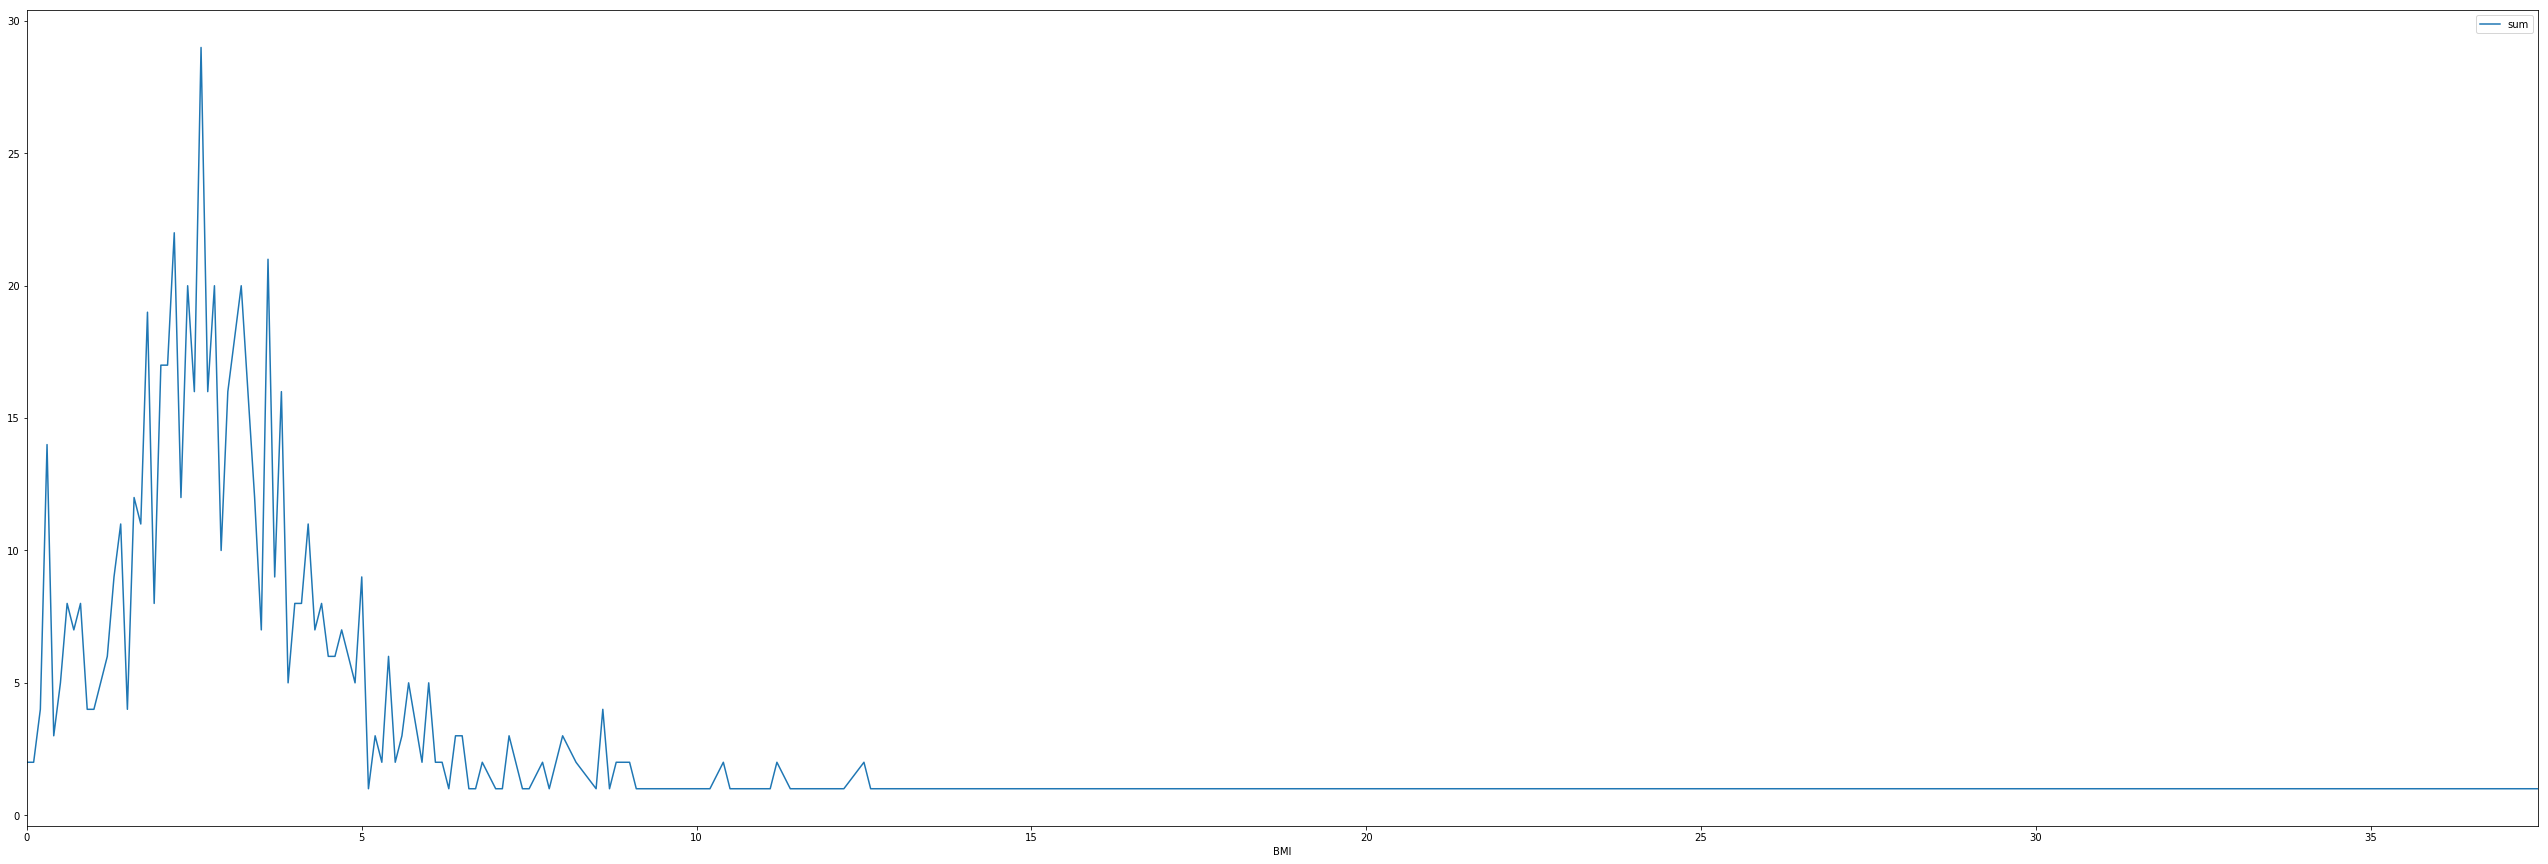

In [4]:
bmi_count.plot(figsize = (45, 15))


Из полученных данных можно сделать вывод, что покемоны, в основном, не страдают от лишнего веса и ожирения. Большинство из них имеют индекс массы, соответсвующий "норме", но есть отдельные виды покемонов, которые имеют критически низкий или высокий индекс массы тела.